# --- Day 15: Dueling Generators ---

In [1]:
# Generator A starts with 277
# Generator B starts with 349
a_start = 277
b_start = 349

# test values
# a_start = 65
# b_start = 8921

#
fac_a = 16807
fac_b = 48271

modulus = 2147483647

mask = 65535
#iterations = 5
iterations1 = 40000000
iterations2 = 5000000

## Part 1

In [2]:
def gen(start, mult):
    value = start
    while True:
        value = value * mult % modulus
        yield value

In [3]:
%%timeit -n 1 -r 1
a = gen(a_start, fac_a)
b = gen(b_start, fac_b)
n = 0
for _ in range(iterations1):
    a_val, b_val = next(a), next(b)
    comp = (a_val ^ b_val) & mask
    if not comp:
        n += 1
    
print(f'part 1 answer: {n}')

part 1 answer: 592
36.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### pre-meltdown/spectre fix
    part 1 answer: 592
    35.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
### post-fix
    part 1 answer: 592
    36.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
## Part 2

In [4]:
def gen4(start, mult):
    value = start
    while True:
        value = value * mult % modulus
        if not (value & 3): 
            yield value
            
def gen8(start, mult):
    value = start
    while True:
        value = value * mult % modulus
        if not (value & 7):
            yield value

In [5]:
%%timeit -n 1 -r 1
a = gen4(a_start, fac_a)
b = gen8(b_start, fac_b)
n = 0
for _ in range(iterations2):
    a_val, b_val = next(a), next(b)
    comp = (a_val ^ b_val) & mask
    if not comp:
        n += 1
    
print(f'part 2 answer: {n}')

part 2 answer: 320
17.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## eye candy

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### correlations of the two different generators

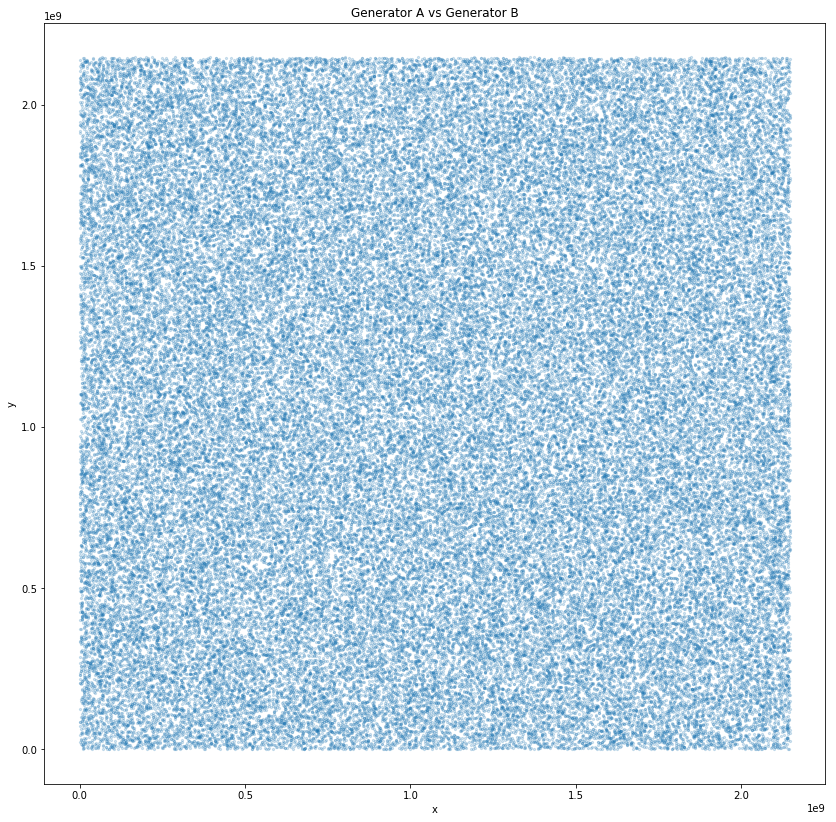

In [38]:
points = 100000
a = gen(a_start, fac_a)
b = gen(b_start, fac_b)
df = pd.DataFrame([(next(a), next(b)) for i in range(points)], columns=['x', 'y'])

fin, ax = plt.subplots(figsize=(14,14))
df.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', alpha=0.2, title='Generator A vs Generator B')

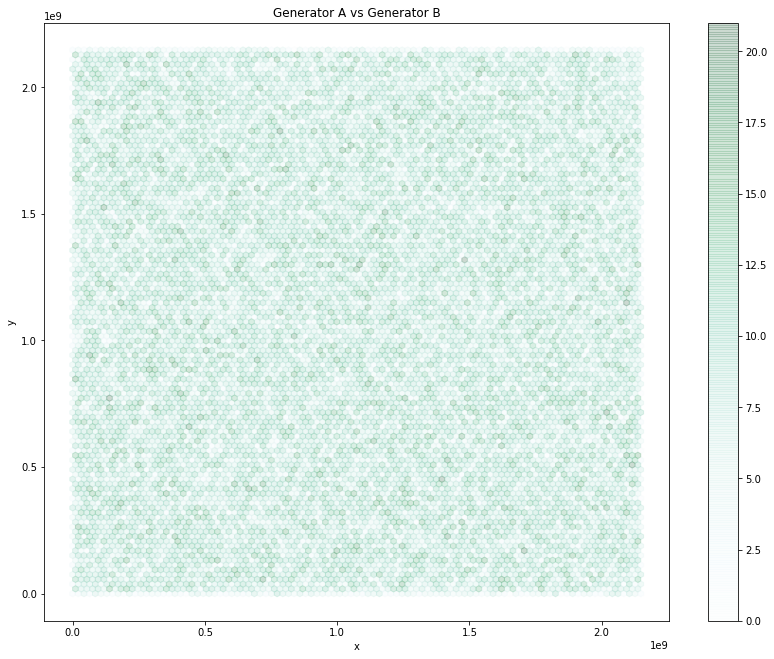

In [39]:
fin, ax = plt.subplots(figsize=(14,11))
df.plot(ax=ax, kind='hexbin', x='x', y='y', alpha=0.2, title='Generator A vs Generator B')

### self-correlations between generator and its own next value

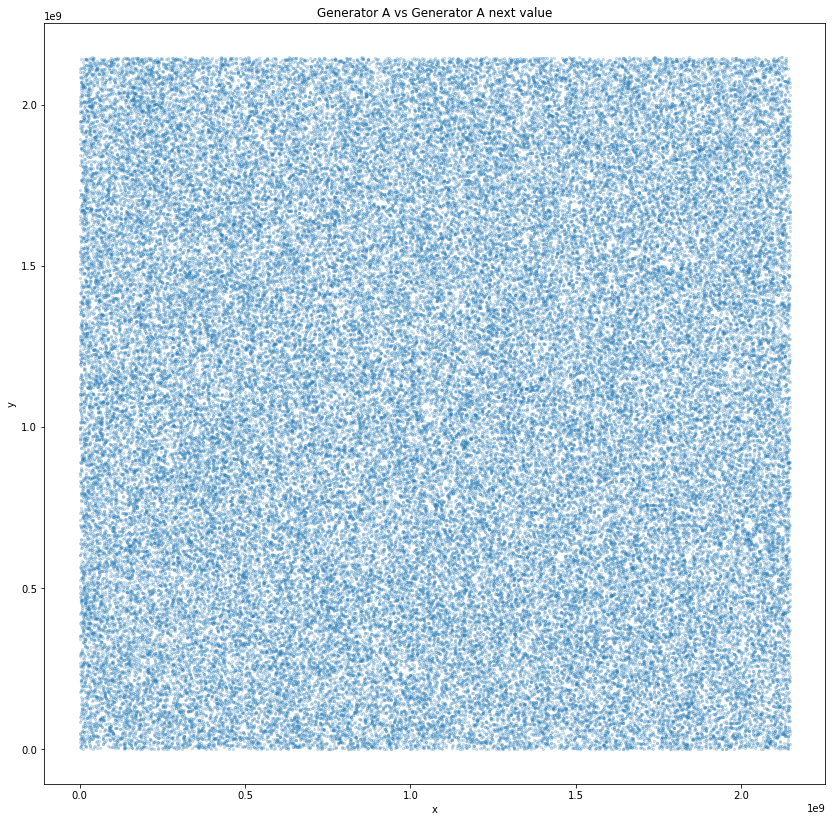

In [40]:
points = 100000
a = gen(a_start, fac_a)

df = pd.DataFrame([(next(a), next(a)) for i in range(points)], columns=['x', 'y'])

fin, ax = plt.subplots(figsize=(14,14))
df.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', alpha=0.2, title='Generator A vs Generator A next value')

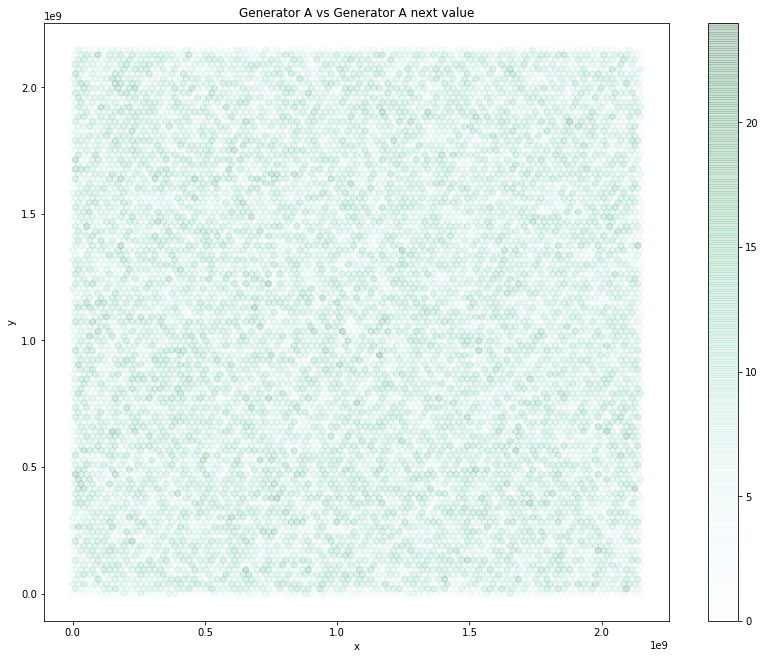

In [41]:
fin, ax = plt.subplots(figsize=(14,11))
df.plot(ax=ax, kind='hexbin', x='x', y='y', alpha=0.2, title='Generator A vs Generator A next value')